In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from iminuit import Minuit

In [25]:
font = {'family' : 'latex',
        'weight' : 'bold',
        'size'   : 22}
plt.rcParams.update({'font.size': 14,
                    'font.weight': 'bold'})

In [26]:
fname_HEP_4_cuts = "HEP_out"
HEP_4_cuts = pd.read_csv(fname_HEP_4_cuts, sep='\\s+')
HEP_4_cuts

,best_acc,averageInteractionsPerCrossing,p_Rhad,p_Rhad1,p_TRTTrackOccupancy,p_topoetcone40,p_eTileGap3Cluster,p_phiModCalo,p_etaModCalo,Number_of_settings,Elapsed_time,task_time_[mus],n_ranks
0,0.736744,42.6024,0.046641,0.029609,0.474643,5.33589,0.332421,-0.000001,0.012534,65536,7.65195,116.7590,32
1,0.736744,42.6024,0.046641,0.029609,0.474643,5.33589,0.332421,-0.000001,0.012534,65536,3.90716,59.6186,64
2,0.736744,42.6024,0.046641,0.029609,0.474643,5.33589,0.332421,-0.000001,0.012534,65536,15.34660,234.1700,16
3,0.736744,42.6024,0.046641,0.029609,0.474643,5.33589,0.332421,-0.000001,0.012534,65536,2.33200,35.5835,128
4,0.736744,42.6024,0.046641,0.029609,0.474643,5.33589,0.332421,-0.000001,0.012534,65536,31.48330,480.3960,8
5,0.736744,42.6024,0.046641,0.029609,0.474643,5.33589,0.332421,-0.000001,0.012534,65536,68.51450,1045.4500,4
6,0.736744,42.6024,0.046641,0.029609,0.474643,5.33589,0.332421,-0.000001,0.012534,65536,174.38000,2660.8300,2


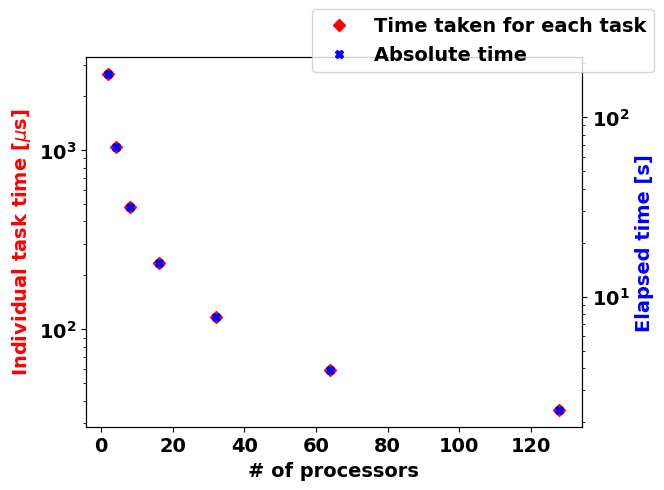

In [48]:

#plt.plot(, , '.', label="Task time [$\mu$s]")
#plt.plot(, , '.', label="Absolute time [s]")
#plt.yscale('log')

fig, ax1 = plt.subplots()
# Plotting the first dataset
ax1.plot(HEP_4_cuts["n_ranks"], HEP_4_cuts["task_time_[mus]"], 'rD', label="Time taken for each task")
ax1.set_xlabel('# of processors', fontweight="bold")
ax1.set_ylabel('Individual task time [$\mu$s]', color='r', fontweight="bold")
# Creating the second y-axis
ax2 = ax1.twinx()
ax2.plot(HEP_4_cuts["n_ranks"], HEP_4_cuts["Elapsed_time"], 'bX', label="Absolute time")
ax2.set_ylabel('Elapsed time [s]', color='b', fontweight='bold')
ax1.set_yscale('log')
ax2.set_yscale('log')
fig.legend()
plt.show()

In [123]:
def amdahl(N,a,p):
    return a/((1-p)+p/(N-1))

def _least_squares(x,y,a,p):
    ymod = amdahl(x,a,p)
    return np.sum((np.log(ymod)-np.log(y))**2)

least_squares_4 = lambda a,pinv: _least_squares(HEP_4_cuts["n_ranks"],
                                           1/HEP_4_cuts["Elapsed_time"],
                                           a,1/(1-pinv))
HEP4_min = Minuit(least_squares_4, a = 1/177.8, pinv = 500)
HEP4_min.fixed["a"] = True
display(HEP4_min.migrad())
a4,p4 = HEP4_min.values[:]

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 53.16                      │              Nfcn = 43               │
│ EDM = 0.000116 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  5.62e-3  │  0.06e-3  │            │            │         │         │  yes  │
│ 1 │ pinv │   0.1e6   │   3.1e6   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────┬───────────────────┐
│      │        a     pinv │
├──────┼───────────────────┤
│    a │        0     0e12 │
│ pinv │     0e12 9.71e+12 │
└──────┴───────────────────┘

In [110]:
least_squares_4(1/284,00)

0.11971378306529881

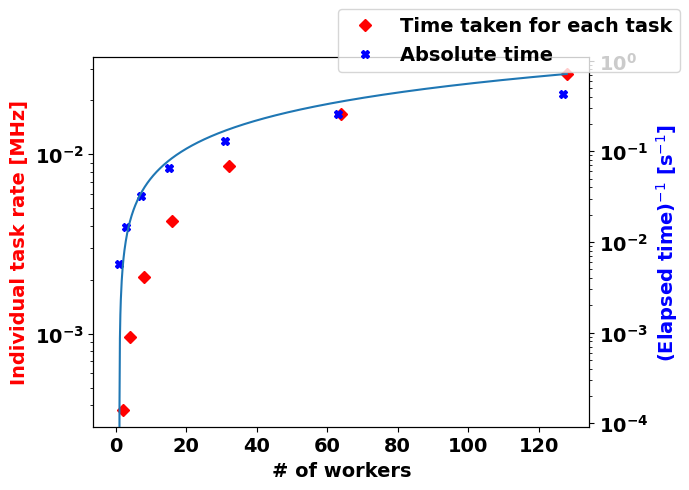

In [125]:
fig, ax1 = plt.subplots()
# Plotting the first dataset
ax1.plot(HEP_4_cuts["n_ranks"], 1/HEP_4_cuts["task_time_[mus]"], 'rD', label="Time taken for each task")
ax1.set_xlabel('# of workers', fontweight="bold")
ax1.set_ylabel('Individual task rate [MHz]', color='r', fontweight="bold")
# Creating the second y-axis
ax2 = ax1.twinx()
ax2.plot(HEP_4_cuts["n_ranks"]-1, 1/HEP_4_cuts["Elapsed_time"], 'bX', label="Absolute time")

plotNranks = np.linspace(0,128,1000)

ax2.plot(plotNranks, amdahl(plotNranks,1/177.8,1-1/p4))

ax2.set_ylabel('(Elapsed time)$^{-1}$ [s$^{-1}$]', color='b', fontweight='bold')
ax1.set_yscale('log')
ax2.set_yscale('log')
fig.legend()
plt.show()

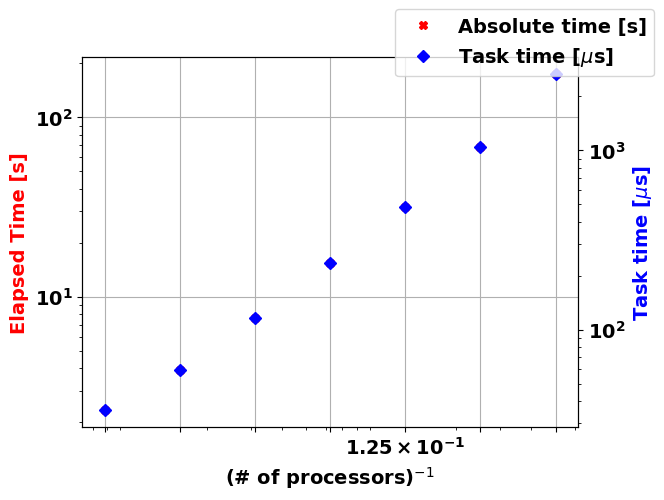

In [150]:
fig, ax1 = plt.subplots()
# Plotting the first dataset
ax1.plot(1/HEP_4_cuts["n_ranks"], HEP_4_cuts["Elapsed_time"], 'rX', label="Absolute time [s]")
ax1.set_xlabel('(# of processors)$^{-1}$', fontweight="bold")
ax1.set_ylabel('Elapsed Time [s]', color='r', fontweight="bold")
# Creating the second y-axis
ax2 = ax1.twinx()
ax2.plot(1/HEP_4_cuts["n_ranks"], HEP_4_cuts["task_time_[mus]"], 'bD', label="Task time [$\mu$s]")


plotNranks = np.linspace(0,128,1000)

#ax2.plot(plotNranks, amdahl(plotNranks,1/284,1-1/p4))

ax2.set_ylabel('Task time [$\mu$s]', color='b', fontweight='bold')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax2.set(xticks=[])
ax1.set(xticks=0.5**np.arange(7,0,-1))
fig.legend()
ax1.grid(True)
plt.show()